In [1]:
import pickle 
import numpy as np
import cv2
#file to generate VIA_intensity arrays 

In [6]:

IMAGE_SIZE = 150
def generate_VIA_Array(img) -> np.ndarray:
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    lower_yellow = np.array([20, 100, 200])
    upper_yellow = np.array([30, 255, 255])
    lower_orange = np.array([5, 50, 200])
    upper_orange = np.array([10, 255, 255])

    mask1 = cv2.inRange(hsv, lower_orange, upper_orange)
    mask2 = cv2.inRange(hsv, lower_yellow, upper_yellow)
    pixel_count1 = np.sum(mask1, axis=0)
    pixel_count2 = np.sum(mask2, axis=0)
    pixel_count = pixel_count1 + pixel_count2
    return pixel_count






In [7]:
def generate_HIA_Array(img) -> np.ndarray:
    #resize to 150 by 150
    img = cv2.resize(img, (IMAGE_SIZE, IMAGE_SIZE))
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    lower_yellow = np.array([20, 100, 200])
    upper_yellow = np.array([30, 255, 255])
    lower_orange = np.array([5, 50, 200])
    upper_orange = np.array([10, 255, 255])

    mask1 = cv2.inRange(hsv, lower_orange, upper_orange)
    mask2 = cv2.inRange(hsv, lower_yellow, upper_yellow)
    pixel_count1 = np.sum(mask1, axis=1)
    pixel_count2 = np.sum(mask2, axis=1)
    pixel_count = pixel_count1 + pixel_count2
    return pixel_count


[ 8415  9435 10200 10455  9945 10200  9690  8925  9690 11220 12240 13260
 12240 10200  9180  9180  6375  6120  6630  7140 11730 12240 11730 10200
  8925  8415  8415  7905  7395  8670  7650  6885  6375  5865  5865  6120
  8160  8415  9180  9945 10710 10455 10200  9690 10455  9180  9180  8670
  8925  9435  9435  8670  7905  8160  8160  9435 10455 11220 10965 11730
 11220 11730 11475  8925  9945  9690  9690  9690  8670  9180  9945  8925
  8925 11220  9945  9180  9180 11220 10710 10200 10200  9180  8670  8160
  7905  6375  6120  5610  5355  5100  5355  5865  4845  3825  3570  2295
  3060  2040  1020     0   510   765   765  1275  1530   765     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0  1020   255   510   255   255   510   255     0     0     0   255
   765   510     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0]
(150,)


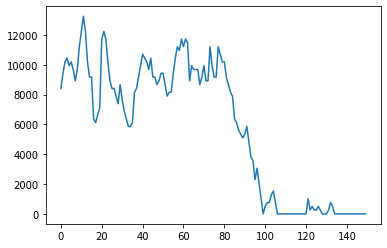

In [11]:
x = generate_HIA_Array(cv2.imread("Fire_full/fire.133.png"))
print(x)
print(x.shape)
#plot the array
import matplotlib.pyplot as plt
plt.plot(x)
plt.show()

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0  255    0  510    0    0  255  255  255    0
    0    0    0    0    0    0    0    0    0    0  765  255 1020 1275
  255    0    0    0    0    0    0 1530    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0]
(150,)


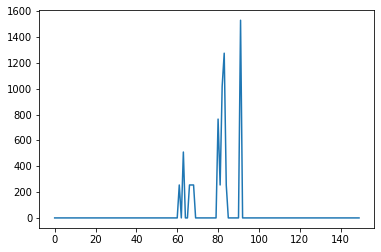

In [12]:
y = generate_HIA_Array(cv2.imread("Flame_cropped/burning-candle-on-table-darkness-260nw-1452419111.jpg"))
print(y)
print(y.shape)
#plot the array
import matplotlib.pyplot as plt
plt.plot(y)
plt.show()

In [11]:


# Load the images from the pickle file
# replace `path_to_X_pkl` with the path to your X.pkl file
with open("A.pkl", 'rb') as f:
    A = pickle.load(f)

# Create an empty list to store intensity arrays for each image
intensity_arrays = []

# Loop through each image and compute its intensity array using `ConvertToArray()`
for img in A:
    intensity_array = generate_VIA_Array(img)
    intensity_arrays.append(intensity_array)

# Save the list of intensity arrays to a pickle file
# replace `path_to_intensity_pkl` with the desired path and filename for your intensity array pickle file
with open("intensity.pkl", 'wb') as f:
    pickle.dump(intensity_arrays, f)

In [14]:
len(intensity_arrays[0])

150

In [15]:
len(intensity_arrays)

932